In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
TRACE_PATH = '/content/drive/MyDrive/anmproject/training_data (1).zip (Unzipped Files)/training_data/2020_05_04/trace/'

In [4]:
import os
filenames = os.listdir(TRACE_PATH)
datasets = [pd.read_csv(TRACE_PATH+file) for file in filenames]

for i, df in enumerate(datasets):
    if df['callType'].iloc[0] == 'JDBC':
      df['serviceName'] = df['dsName']
      df = df.drop(['dsName'], axis=1)
    elif df['callType'].iloc[0] == 'LOCAL':
      df = df.drop(['dsName'], axis=1)
    datasets[i] = df

In [5]:
datasets

[        callType      startTime  ...     cmdb_id  serviceName
 0            CSF  1588521600025  ...      os_021      csf_001
 1            CSF  1588521600026  ...      os_021      csf_001
 2            CSF  1588521600027  ...      os_021      csf_001
 3            CSF  1588521600028  ...      os_022      csf_001
 4            CSF  1588521600028  ...      os_021      csf_001
 ...          ...            ...  ...         ...          ...
 3650200      CSF  1588607984997  ...  docker_002      csf_005
 3650201      CSF  1588607985000  ...  docker_002      csf_004
 3650202      CSF  1588607985039  ...  docker_003      csf_004
 3650203      CSF  1588607985064  ...  docker_003      csf_005
 3650204      CSF  1588607985203  ...  docker_002      csf_005
 
 [3650205 rows x 9 columns],
        callType      startTime  elapsedTime  ...   pid cmdb_id serviceName
 0           OSB  1588521600016        747.0  ...  None  os_021     osb_001
 1           OSB  1588521600019       1132.0  ...  None  os_0

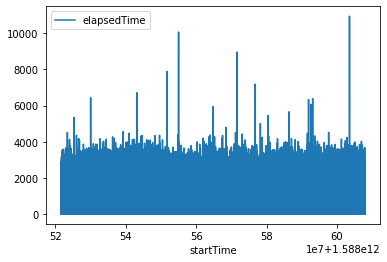

In [6]:
# generate(host,service) pairs
datasets[0].plot('startTime', 'elapsedTime')

In [7]:
for dataset in datasets:
  print(dataset['elapsedTime'].describe())
  dataset

count    3.650205e+06
mean     1.623221e+02
std      3.493014e+02
min      1.300000e+01
25%      2.700000e+01
50%      4.000000e+01
75%      1.220000e+02
max      1.093000e+04
Name: elapsedTime, dtype: float64
count    730041.000000
mean        608.916603
std         609.137235
min         141.000000
25%         208.000000
50%         330.000000
75%         755.000000
max       10947.000000
Name: elapsedTime, dtype: float64
count    3.650205e+06
mean     1.351178e+02
std      3.394052e+02
min      1.100000e+01
25%      2.100000e+01
50%      2.800000e+01
75%      3.900000e+01
max      5.295000e+03
Name: elapsedTime, dtype: float64
count    730041.000000
mean         10.110518
std          21.613297
min           3.000000
25%           5.000000
50%           5.000000
75%           6.000000
max        1401.000000
Name: elapsedTime, dtype: float64
count    1.460082e+07
mean     1.124013e+01
std      2.747132e+01
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      7.0

In [8]:
datasets[1][datasets[1]['elapsedTime'] == 10947.000000]

,callType,startTime,elapsedTime,success,traceId,id,pid,cmdb_id,serviceName
684900,OSB,1588603535225,10947.0,True,5b2e2171e0263f794360,84e90171e0263f794361,None,os_021,osb_001


In [ ]:
from sklearn.cluster import Birch
data = datasets[1]['elapsedTime'].values.reshape(-1,1)

brc = Birch(n_clusters=None)
brc.fit(data)
brc.predict(data)

In [5]:
from sklearn.cluster import Birch

dataset = pd.read_csv(TRACE_PATH + 'trace_osb.csv')
data = dataset['elapsedTime'].values.reshape(-1,1)


array([3326, 1537, 1296, ..., 3392, 3627, 3461])

In [7]:
brc = Birch(n_clusters=2)
brc.fit(data)
predictions = brc.predict(data)

In [13]:
for i in (0,1):
  print(f'Testing values i=={i}')
  print(sum(filter(lambda x: x==i, predictions)))

Testing values i==0
0
Testing values i==1
14879


In [14]:
import numpy as np
np.unique(predictions, return_counts=True)

(array([0, 1]), array([715162,  14879]))

In [15]:
TEST_DATA = '/content/drive/MyDrive/data/trace/'
test_data = pd.read_csv(TEST_DATA + 'trace_osb.csv')

In [19]:
test_data

,startTime,elapsedTime,success,traceId,id,pid,cmdb_id,serviceName,callType
0,1606863598104,1946.0,1,b158517262a9da185958,811d617262a9da185959,None,os_022,osb_001,OSB
1,1606863600023,269.0,1,ea67517262a9e1973758,8212017262a9e1973759,None,os_021,osb_001,OSB
2,1606863600025,363.0,1,a48f617262a9e1993888,2c18d17262a9e1993889,None,os_021,osb_001,OSB
3,1606863600023,367.0,1,8048617262a9e1973884,8f41117262a9e1973885,None,os_021,osb_001,OSB
4,1606863600028,411.0,1,6276417262a9e19b5196,38eff17262a9e19c5197,None,os_021,osb_001,OSB
...,...,...,...,...,...,...,...,...,...
345616,1606899598941,457.0,1,3f1c3172623c005d6712,f9026172623c005d6713,None,os_021,osb_001,OSB
345617,1606899598941,493.0,1,bdf63172623c005d5706,3d357172623c005d5707,None,os_022,osb_001,OSB
345618,1606899598947,495.0,1,a8f4b172623c00638832,39a9b172623c00638833,None,os_022,osb_001,OSB
345619,1606899599012,538.0,1,f602d172623c00a48838,fe5c9172623c00a48839,None,os_022,osb_001,OSB


In [22]:
df = test_data['elapsedTime'].values.reshape(-1,1)

In [24]:
test_predictions = brc.predict(df)

In [26]:
np.unique(test_predictions, return_counts=True)

(array([0, 1]), array([331889,  13732]))

In [27]:
res = np.where(test_predictions == 1)

In [31]:
test_data.iloc[res]['elapsedTime'].describe()

count    13732.000000
mean      3886.723711
std       3246.729089
min       2380.000000
25%       2589.000000
50%       2925.500000
75%       3779.000000
max      58507.000000
Name: elapsedTime, dtype: float64

In [32]:
small_trace = pd.read_csv(TEST_DATA + 'small_trace.csv')
small_trace = small_trace[small_trace['callType'] == 'OSB']
small_trace

,Unnamed: 0,startTime,elapsedTime,success,traceId,id,pid,cmdb_id,serviceName,callType
88970,132792,1606862520032,246.0,1,0e8ff172629966e06140,ed12f172629966e06141,None,os_021,osb_001,OSB
88971,132793,1606862520081,286.0,1,2f6c1172629967115222,39fc6172629967115223,None,os_022,osb_001,OSB
88972,132794,1606862520082,375.0,1,7d96a172629967125224,1b7d9172629967125225,None,os_022,osb_001,OSB
88973,132795,1606862520202,282.0,1,c5f92172629967895562,6f2911726299678a5563,None,os_022,osb_001,OSB
88974,132796,1606862520090,481.0,1,12ff7172629967198352,793191726299671a8353,None,os_022,osb_001,OSB
...,...,...,...,...,...,...,...,...,...,...
91384,135206,1606862792531,604.0,1,e3e13172629d8f537368,e4037172629d8f537369,None,os_022,osb_001,OSB
91385,135207,1606862792592,544.0,1,9b874172629d8f907032,b8749172629d8f907033,None,os_022,osb_001,OSB
91386,135208,1606862792675,572.0,1,ab7a3172629d8fe31164,a41aa172629d8fe31165,None,os_022,osb_001,OSB
91387,135209,1606862792539,710.0,1,e87f1172629d8f5b7026,90410172629d8f5b7027,None,os_022,osb_001,OSB


In [40]:
%%time
small_data = small_trace['elapsedTime'].values.reshape(-1,1)
small_predictions = brc.predict(small_data)

CPU times: user 56.3 ms, sys: 8.02 ms, total: 64.3 ms
Wall time: 63.8 ms


In [34]:
np.unique(small_predictions, return_counts=True)

(array([0, 1]), array([2369,   50]))

In [36]:
sres = np.where(small_predictions == 1)
small_trace.iloc[sres]

,Unnamed: 0,startTime,elapsedTime,success,traceId,id,pid,cmdb_id,serviceName,callType
89329,133151,1606862540893,2470.0,1,ee4051726299b85d6530,099301726299b85d6531,None,os_021,osb_001,OSB
89330,133152,1606862540794,2571.0,1,5597b1726299b7fa6524,94d981726299b7fa6525,None,os_021,osb_001,OSB
89331,133153,1606862540898,2576.0,1,62ca21726299b8627836,33b471726299b8627837,None,os_021,osb_001,OSB
89459,133281,1606862580086,2779.0,1,aae95172629a51768700,a7c5c172629a51768701,None,os_022,osb_001,OSB
89460,133282,1606862580101,2765.0,1,37c21172629a51858704,08147172629a51858705,None,os_022,osb_001,OSB
89469,133291,1606862580411,3081.0,1,04f04172629a52bb8712,2029c172629a52bb8713,None,os_022,osb_001,OSB
89695,133517,1606862595704,2571.0,1,a209c172629a8e788106,48c63172629a8e788107,None,os_021,osb_001,OSB
89701,133523,1606862595795,2984.0,1,84374172629a8ed36812,44467172629a8ed36813,None,os_021,osb_001,OSB
89704,133526,1606862595998,2982.0,1,3708e172629a8f9e6760,e6668172629a8f9e6761,None,os_021,osb_001,OSB
89705,133527,1606862596201,2781.0,1,650b4172629a90696766,31f43172629a90696767,None,os_021,osb_001,OSB


In [39]:
small_trace['elapsedTime'].describe()

count    2419.000000
mean      604.335676
std       595.355222
min        69.000000
25%       206.000000
50%       349.000000
75%       760.000000
max      4013.000000
Name: elapsedTime, dtype: float64

In [42]:
import pickle
with open('clustering_model.pickle', 'wb') as f:
  pickle.dump(brc,f)
